# featureranker - by Logan Hallee

In [1]:
from src.featureranker.rankers import *
from src.featureranker.utils import *
from src.featureranker.plots import *

from sklearn.datasets import load_breast_cancer, load_diabetes
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'classification_ranking' from 'featureranker.rankers' (c:\Users\lhall\AppData\Local\Programs\Python\Python311\Lib\site-packages\featureranker\rankers.py)

## Classification example

In [9]:
# Load and check data
cancer = load_breast_cancer(as_frame=True)
df = cancer.data.merge(cancer.target, left_index=True, right_index=True)
view_data(df)
X, y = get_data(df, target='target')

There are no NaN values in the dataset.
Column count after dropping those with > 80.0% missing values: 30
No constant columns found.


Starting feature ranking for task: Classification
No choices provided. Using default ranking methods: ['rf', 'xg', 'mi', 'f_test', 'l1']
Starting Random Forest classification ranking...


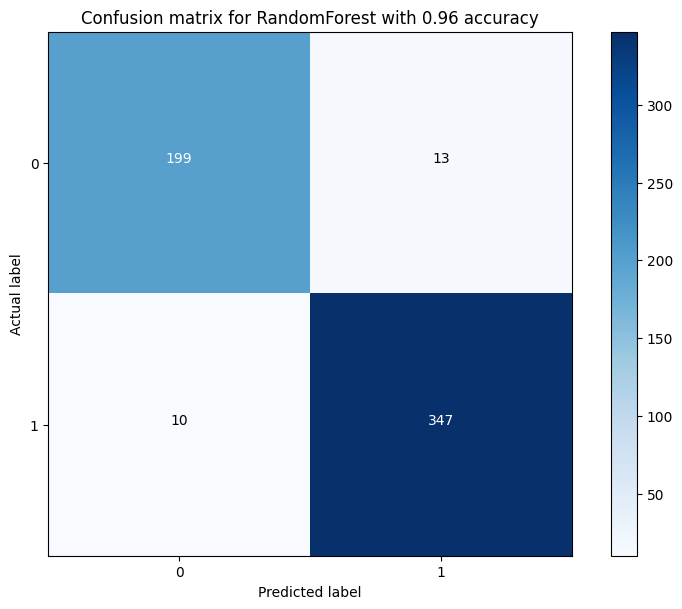

Completed Random Forest classification ranking.
Starting XGBoost classification ranking...


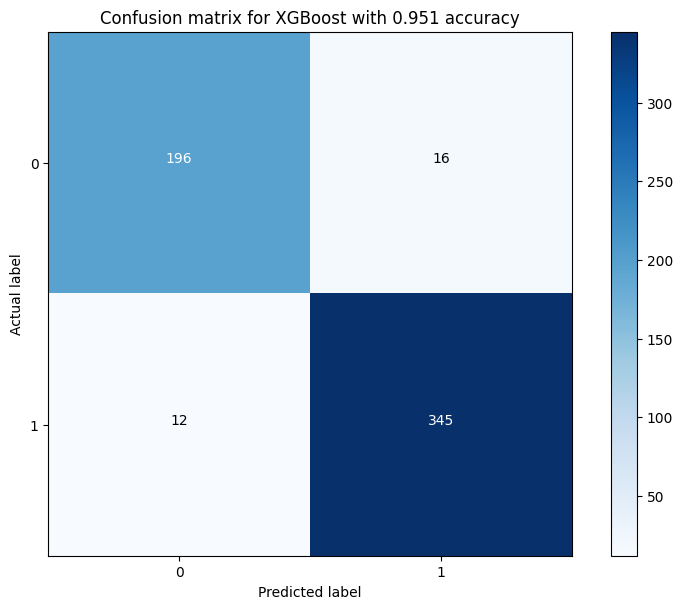

Completed XGBoost classification ranking.
Starting Mutual Information classification ranking...
Completed Mutual Information classification ranking.
Starting F-Test classification ranking...
Completed F-Test classification ranking.
Starting L1 classification ranking...
Completed L1 classification ranking.
Feature ranking completed successfully.


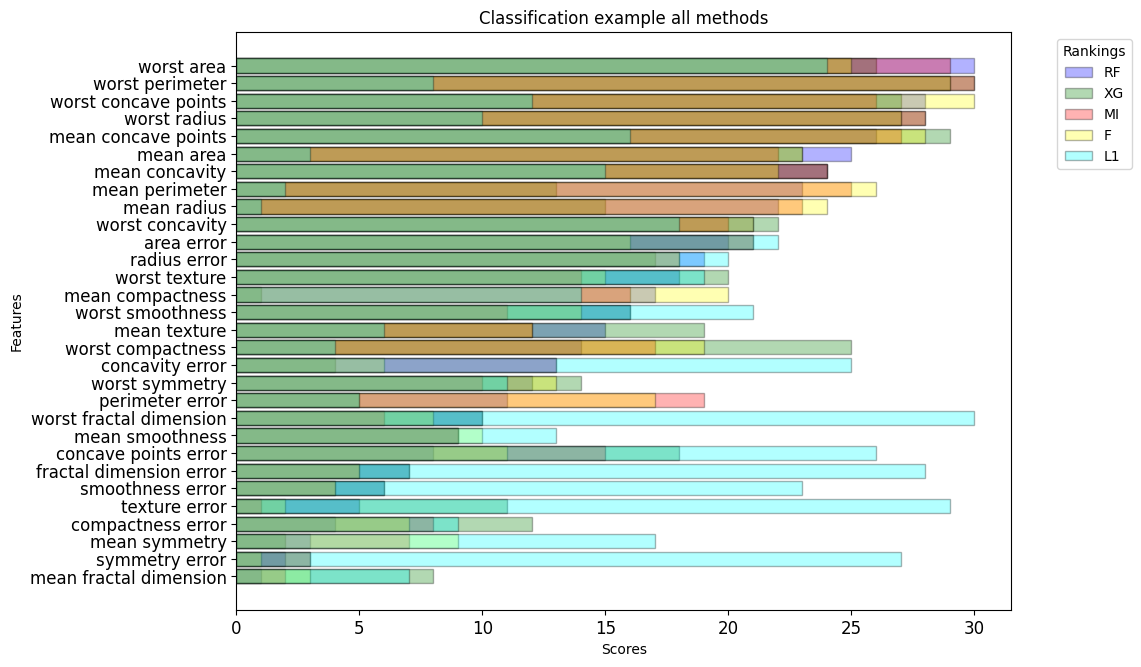

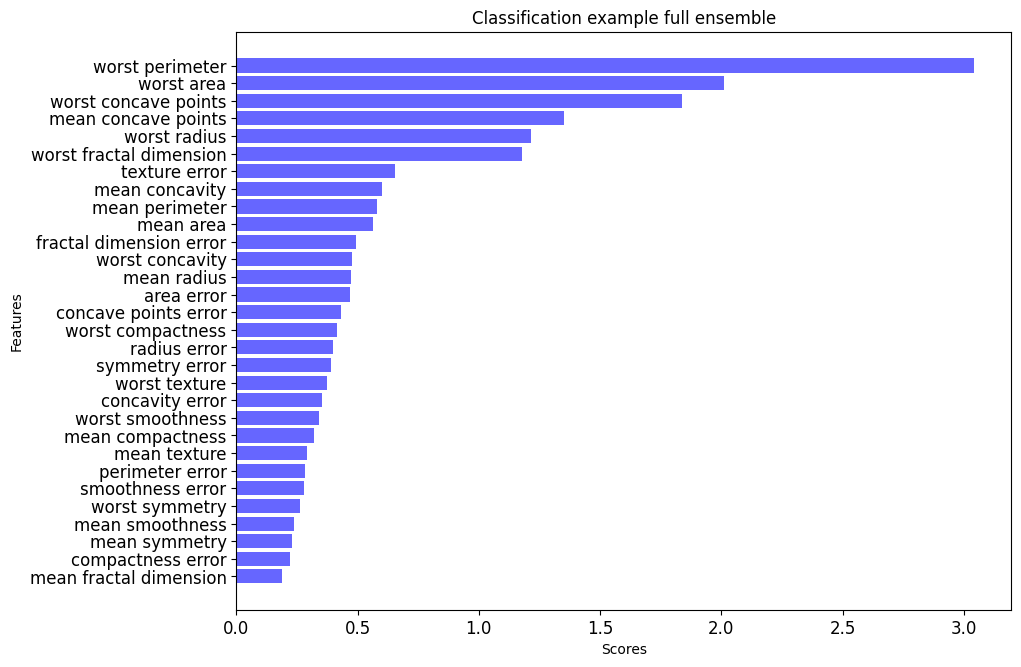

In [10]:
# Minimum settings
rankings = feature_ranking(X, y, task='classification')
scoring = voting(rankings)
plot_rankings(rankings, title='Classification example all methods')
plot_after_vote(scoring, title='Classification example full ensemble')

Starting feature ranking for task: Classification
Ranking methods selected: ['mi', 'f_test', 'l1']
Starting Mutual Information classification ranking...
Completed Mutual Information classification ranking.
Starting F-Test classification ranking...
Completed F-Test classification ranking.
Starting L1 classification ranking...
Completed L1 classification ranking.
Feature ranking completed successfully.


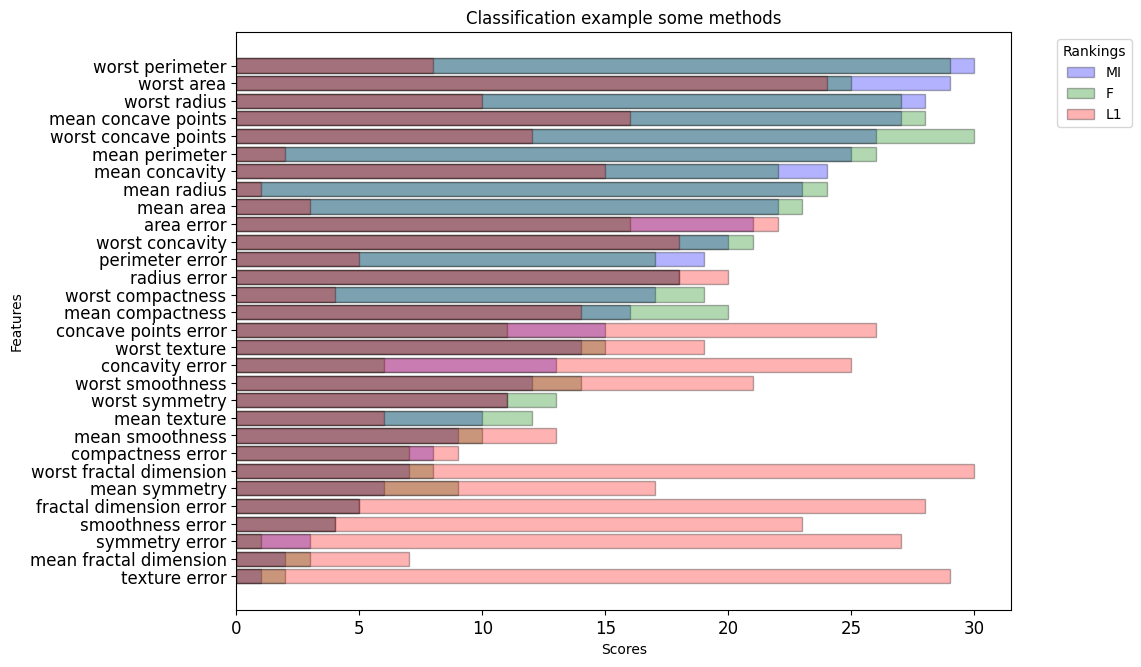

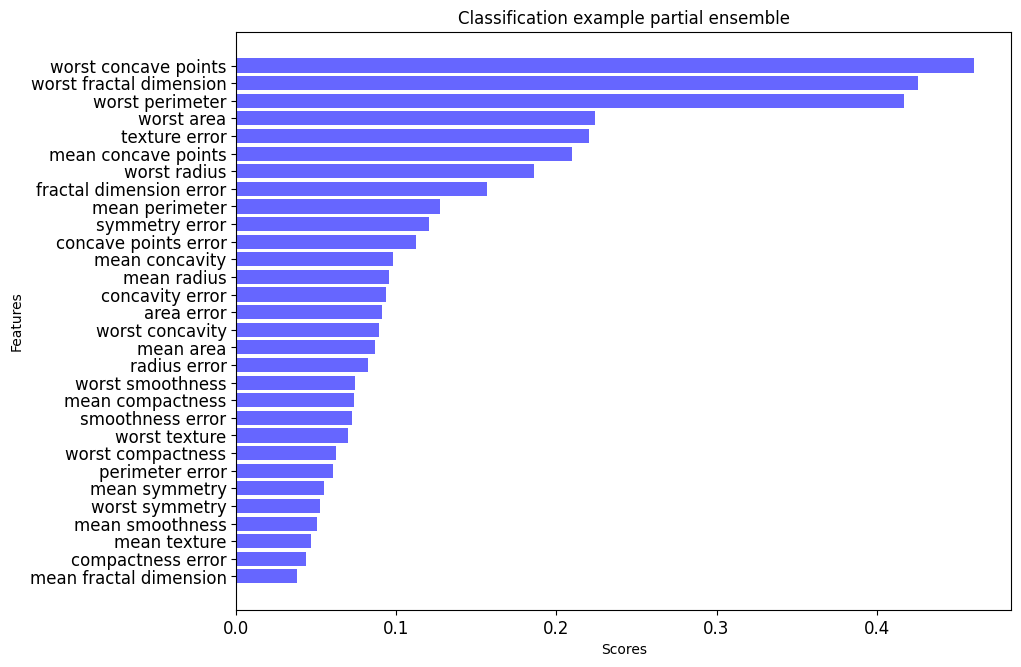

In [11]:
# Try different methods and different weights
rankings = feature_ranking(X, y, task='classification', choices=['mi', 'f_test', 'l1'])
scoring = voting(rankings, weights=(0.2, 0.4, 0.4)) # they do not need to sum to 1
plot_rankings(rankings, title='Classification example some methods')
plot_after_vote(scoring, title='Classification example partial ensemble')

## Regression example

In [12]:
# Load and check data
diabetes = load_diabetes(as_frame=True)
df = diabetes.data.merge(diabetes.target, left_index=True, right_index=True)
view_data(df)
X, y = get_data(df, target='target')

There are no NaN values in the dataset.
Column count after dropping those with > 80.0% missing values: 10
No constant columns found.


Starting feature ranking for task: Regression
No choices provided. Using default ranking methods: ['rf', 'xg', 'mi', 'f_test', 'l1']
Starting Random Forest regression ranking...


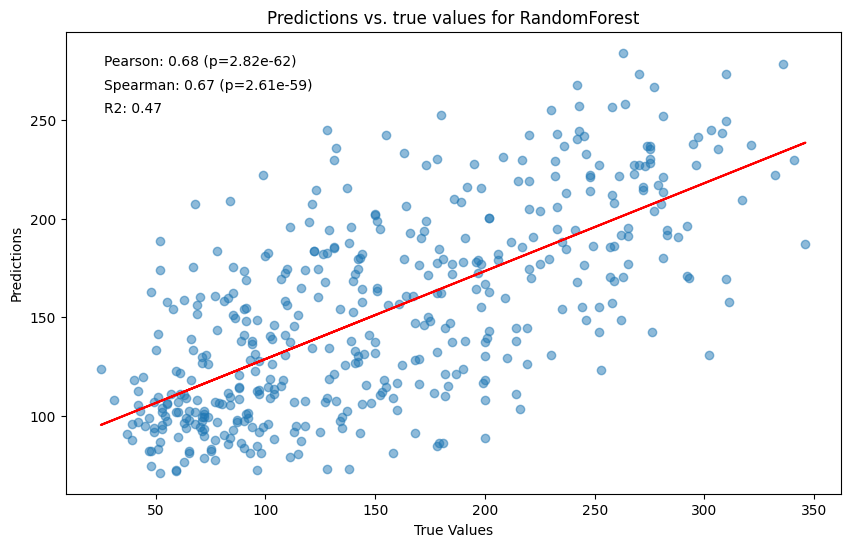

Completed Random Forest regression ranking.
Starting XGBoost regression ranking...


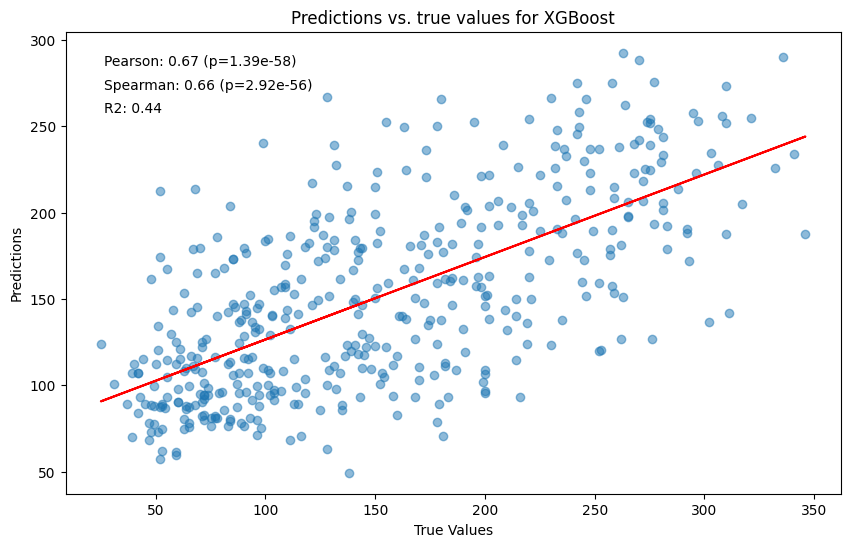

Completed XGBoost regression ranking.
Starting Mutual Information regression ranking...
Completed Mutual Information regression ranking.
Starting F-Test regression ranking...
Completed F-Test regression ranking.
Starting L1 regression ranking...
Completed L1 regression ranking.
Feature ranking completed successfully.


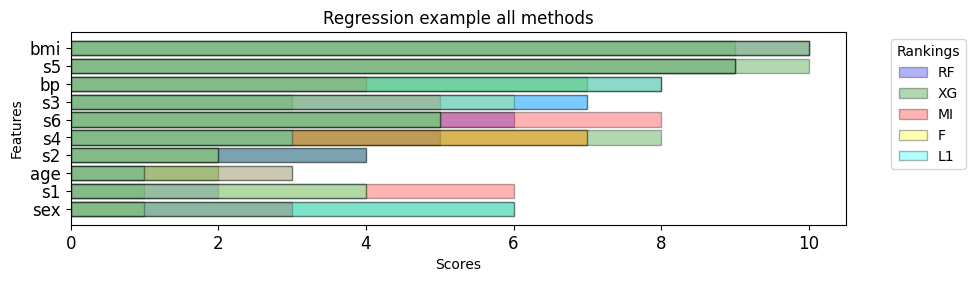

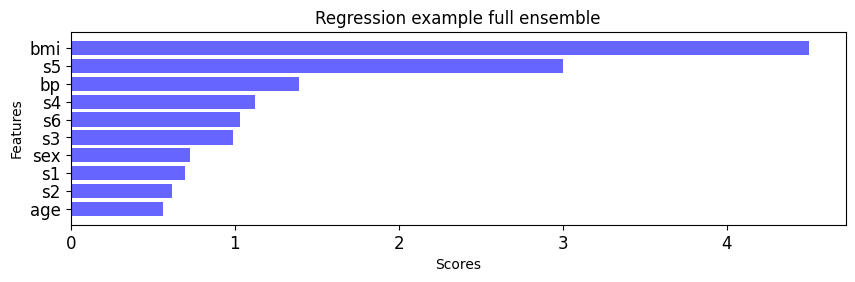

In [13]:
# Minimum settings
rankings = feature_ranking(X, y, task='regression')
scoring = voting(rankings)
plot_rankings(rankings, title='Regression example all methods')
plot_after_vote(scoring, title='Regression example full ensemble')

In [ ]:
# Try a more thorough / expensive search, this will take much longer but will give a better ranking
rankings = feature_ranking(X, y, cv=5, n_iter=100)
scoring = voting(rankings)
plot_rankings(rankings, title='Classification example expensive methods')
plot_after_vote(scoring, title='Classification example expensive ensemble')
# Performance is slighlty better (explains more variance) and more nuanced feature ranking towards the less influential features